<a href="https://colab.research.google.com/github/masud1301/AACHARYAPINGAL_PS14/blob/main/Copy_of_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("intelligent_issue_dataset.csv")

# Display first 5 records
df.head()

,issue_text,category_label,priority_label,timestamp,source
0,Email account not accessible,IT Support,Medium,2026-01-17,Class
1,Network outage in computer lab,Network,High,2026-01-02,Class
2,Bonafide certificate pending,Admin,Medium,2026-01-16,Class
3,Internal marks not visible,Academic,Medium,2026-01-30,Office
4,Classroom projector not working,Facilities,Low,2026-01-14,Office


In [ ]:
# Shape of dataset (rows, columns)
print("Dataset Shape:", df.shape)

# Column names
print("\nColumns:")
print(df.columns)

# Data types
print("\nData Types:")
print(df.dtypes)

# Basic information
print("\nDataset Info:")
df.info()


Dataset Shape: (250, 5)

Columns:
Index(['issue_text', 'category_label', 'priority_label', 'timestamp',
       'source'],
      dtype='object')

Data Types:
issue_text        object
category_label    object
priority_label    object
timestamp         object
source            object
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   issue_text      250 non-null    object
 1   category_label  250 non-null    object
 2   priority_label  250 non-null    object
 3   timestamp       250 non-null    object
 4   source          250 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
issue_text        0
category_label    0
priority_label    0
timestamp         0
source            0
dtype: int64


In [ ]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 4


In [ ]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (246, 5)


In [ ]:
# Remove rows with missing issue text
df = df.dropna(subset=["issue_text"])

# (Optional) Fill missing category or priority labels
df["category_label"] = df["category_label"].fillna("Unknown")
df["priority_label"] = df["priority_label"].fillna("Medium")

print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
issue_text        0
category_label    0
priority_label    0
timestamp         0
source            0
dtype: int64


In [ ]:
# Category distribution
print("\nCategory Distribution:")
print(df["category_label"].value_counts())

# Priority distribution
print("\nPriority Distribution:")
print(df["priority_label"].value_counts())



Category Distribution:
category_label
Admin         63
Facilities    50
Network       50
Academic      48
IT Support    35
Name: count, dtype: int64

Priority Distribution:
priority_label
Low       93
High      79
Medium    74
Name: count, dtype: int64


In [ ]:
# Convert timestamp column to datetime (if exists)
if "timestamp" in df.columns:
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    print("Timestamp converted to datetime format")


Timestamp converted to datetime format


In [ ]:
df.head()


,issue_text,category_label,priority_label,timestamp,source
0,Email account not accessible,IT Support,Medium,2026-01-17,Class
1,Network outage in computer lab,Network,High,2026-01-02,Class
2,Bonafide certificate pending,Admin,Medium,2026-01-16,Class
3,Internal marks not visible,Academic,Medium,2026-01-30,Office
4,Classroom projector not working,Facilities,Low,2026-01-14,Office


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = clean_text(text)
    words = text.split()
    words = [lemmatizer.lemmatize(word)
             for word in words
             if word not in stop_words]
    return " ".join(words)


In [ ]:
# Apply preprocessing on issue_text column
df["clean_issue_text"] = df["issue_text"].apply(preprocess_text)

# View original vs cleaned text
df[["issue_text", "clean_issue_text"]].head()


,issue_text,clean_issue_text
0,Email account not accessible,email account accessible
1,Network outage in computer lab,network outage computer lab
2,Bonafide certificate pending,bonafide certificate pending
3,Internal marks not visible,internal mark visible
4,Classroom projector not working,classroom projector working


In [ ]:
# Length of cleaned text
df["text_length"] = df["clean_issue_text"].apply(lambda x: len(x.split()))

df[["clean_issue_text", "text_length"]].head()


,clean_issue_text,text_length
0,email account accessible,3
1,network outage computer lab,4
2,bonafide certificate pending,3
3,internal mark visible,3
4,classroom projector working,3


In [ ]:
# Remove rows where cleaning removed all words
df = df[df["clean_issue_text"].str.strip().astype(bool)]

print("Final dataset shape after preprocessing:", df.shape)


Final dataset shape after preprocessing: (246, 7)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tfidf = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1, 2)
)


In [ ]:
X = tfidf.fit_transform(df["clean_issue_text"])


In [ ]:
# Category labels
y_category = df["category_label"]

# Priority labels
y_priority = df["priority_label"]


In [ ]:
print("TF-IDF Matrix Shape:", X.shape)


TF-IDF Matrix Shape: (246, 126)


In [ ]:
# View first 20 feature names
print(tfidf.get_feature_names_out()[:20])


['accessible' 'account' 'account accessible' 'application'
 'application loading' 'approval' 'approval delayed' 'assignment'
 'assignment submission' 'bonafide' 'bonafide certificate' 'broken'
 'broken chair' 'cable' 'cable connecting' 'certificate'
 'certificate pending' 'chair' 'chair classroom' 'classroom']


In [ ]:
# Save vectorizer
import joblib

joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [ ]:
# Train and test Split

from sklearn.model_selection import train_test_split

# Split for category classification
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
    X, y_category, test_size=0.2, random_state=42
)

# Split for priority prediction
X_train_pri, X_test_pri, y_train_pri, y_test_pri = train_test_split(
    X, y_priority, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize model
category_model = LogisticRegression(max_iter=1000)

# Train model
category_model.fit(X_train_cat, y_train_cat)


LogisticRegression(max_iter=1000)

In [ ]:
# Predict categories
y_pred_cat = category_model.predict(X_test_cat)


In [ ]:
# Priority prediction model

# Initialize model
priority_model = LogisticRegression(max_iter=1000)

# Train model
priority_model.fit(X_train_pri, y_train_pri)


LogisticRegression(max_iter=1000)

In [ ]:
# Predict priorities
y_pred_pri = priority_model.predict(X_test_pri)


In [ ]:
# Category classification evaluation

from sklearn.metrics import accuracy_score, classification_report

print("Category Classification Accuracy:",
      accuracy_score(y_test_cat, y_pred_cat))

print("\nCategory Classification Report:")
print(classification_report(y_test_cat, y_pred_cat))


Category Classification Accuracy: 1.0

Category Classification Report:
              precision    recall  f1-score   support

    Academic       1.00      1.00      1.00        10
       Admin       1.00      1.00      1.00         9
  Facilities       1.00      1.00      1.00        16
  IT Support       1.00      1.00      1.00         6
     Network       1.00      1.00      1.00         9

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
# Priority prediction evaluation

print("Priority Prediction Accuracy:",
      accuracy_score(y_test_pri, y_pred_pri))

print("\nPriority Classification Report:")
print(classification_report(y_test_pri, y_pred_pri))


Priority Prediction Accuracy: 0.38

Priority Classification Report:
              precision    recall  f1-score   support

        High       0.27      0.31      0.29        13
         Low       0.52      0.50      0.51        24
      Medium       0.25      0.23      0.24        13

    accuracy                           0.38        50
   macro avg       0.35      0.35      0.35        50
weighted avg       0.38      0.38      0.38        50



In [ ]:
# Save Trained Models

import joblib

joblib.dump(category_model, "category_model.pkl")
joblib.dump(priority_model, "priority_model.pkl")


['priority_model.pkl']

In [ ]:
sample_issue = ["Internet is not working in lab"]

# Preprocess
sample_clean = preprocess_text(sample_issue[0])

# Vectorize
sample_vector = tfidf.transform([sample_clean])

# Predict
pred_category = category_model.predict(sample_vector)[0]
pred_priority = priority_model.predict(sample_vector)[0]

print("Predicted Category:", pred_category)
print("Predicted Priority:", pred_priority)


Predicted Category: Network
Predicted Priority: Low


In [ ]:
# Keyword Extraction (Top Terms using TF-IDF)
# Top Keywords Overall

import numpy as np

# Get feature names
feature_names = tfidf.get_feature_names_out()

# Calculate average TF-IDF score for each term
avg_tfidf_scores = np.asarray(X.mean(axis=0)).ravel()

# Create DataFrame of keywords
keywords_df = pd.DataFrame({
    "keyword": feature_names,
    "tfidf_score": avg_tfidf_scores
})

# Top 20 keywords
top_keywords = keywords_df.sort_values(
    by="tfidf_score", ascending=False
).head(20)

print("Top Keywords Overall:")
print(top_keywords)


Top Keywords Overall:
                  keyword  tfidf_score
10   bonafide certificate     0.034541
9                bonafide     0.034541
16    certificate pending     0.034541
15            certificate     0.034541
77                pending     0.034541
78                 portal     0.031592
19              classroom     0.028918
96          since morning     0.027269
67                morning     0.027269
90           router since     0.027269
95                  since     0.027269
89                 router     0.027269
124               working     0.026388
109      syllabus updated     0.024171
113        updated portal     0.024171
112               updated     0.024171
108              syllabus     0.024171
42                 hostel     0.023823
119         washroom need     0.023633
68                   need     0.023633


In [ ]:
# Top Keywords per Category

top_keywords_per_category = {}

# Store the current index of df to map back to X
df_current_index = df.index

for category in df["category_label"].unique():
    # Get the indices (labels) of rows belonging to the current category
    category_label_indices = df[df["category_label"] == category].index

    # Get the integer positions of these labels in the current df's index.
    # These integer positions correspond to the rows in X.
    category_ilocs = df_current_index.get_indexer(category_label_indices)

    # Select the rows from X using the integer positions
    category_tfidf = X[category_ilocs]

    avg_scores = np.asarray(category_tfidf.mean(axis=0)).ravel()

    temp_df = pd.DataFrame({
        "keyword": feature_names,
        "tfidf_score": avg_scores
    }).sort_values(by="tfidf_score", ascending=False).head(10)

    top_keywords_per_category[category] = temp_df

# Display results
for category, data in top_keywords_per_category.items():
    print(f"\nTop Keywords for {category}:")
    print(data)


Top Keywords for IT Support:
                keyword  tfidf_score
0            accessible     0.127775
1               account     0.127775
2    account accessible     0.127775
33        email account     0.127775
32                email     0.127775
3           application     0.098974
4   application loading     0.098974
61              loading     0.098974
51        issue student     0.090829
62                login     0.090829

Top Keywords for Network:
            keyword  tfidf_score
90     router since     0.134164
96    since morning     0.134164
95            since     0.134164
89           router     0.134164
67          morning     0.134164
22         computer     0.083152
75  outage computer     0.083152
74           outage     0.083152
70          network     0.083152
23     computer lab     0.083152

Top Keywords for Admin:
                  keyword  tfidf_score
10   bonafide certificate     0.134874
9                bonafide     0.134874
16    certificate pending     0

In [ ]:
# Issue Frequency Analysis

category_counts = df["category_label"].value_counts()
print("Issues per Category:")
print(category_counts)


Issues per Category:
category_label
Admin         63
Facilities    50
Network       50
Academic      48
IT Support    35
Name: count, dtype: int64


In [ ]:
# Issues per Priority Level

priority_counts = df["priority_label"].value_counts()
print("Issues per Priority:")
print(priority_counts)


Issues per Priority:
priority_label
Low       93
High      79
Medium    74
Name: count, dtype: int64


In [ ]:
# Time-Based Trend Analysis (If Timestamp Exists)

if "timestamp" in df.columns:
    df["date"] = df["timestamp"].dt.date

    issues_over_time = df.groupby("date").size()

    print("Issues over time:")
    print(issues_over_time.head())


Issues over time:
date
2026-01-01     6
2026-01-02     8
2026-01-03    12
2026-01-04     8
2026-01-05     3
dtype: int64


In [ ]:
# Clustering Similar Issues (K-Means)

from sklearn.cluster import KMeans

# Define number of clusters
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
df["cluster"] = kmeans.fit_predict(X)


In [ ]:
# View Sample Issues from Each Cluster

for i in range(k):
    print(f"\nCluster {i} Sample Issues:")
    print(df[df["cluster"] == i]["issue_text"].head(5))



Cluster 0 Sample Issues:
13     Login issue on student portal
15     Login issue on student portal
26    Syllabus not updated on portal
47     Login issue on student portal
55     Login issue on student portal
Name: issue_text, dtype: object

Cluster 1 Sample Issues:
2     Bonafide certificate pending
6     Bonafide certificate pending
21    Bonafide certificate pending
29    Bonafide certificate pending
32    Bonafide certificate pending
Name: issue_text, dtype: object

Cluster 2 Sample Issues:
0      Email account not accessible
1    Network outage in computer lab
3        Internal marks not visible
5      Unable to reset ERP password
7      Water supply issue in hostel
Name: issue_text, dtype: object

Cluster 3 Sample Issues:
9     Fee receipt not generated
23    Fee receipt not generated
59    Fee receipt not generated
66    Fee receipt not generated
91    Fee receipt not generated
Name: issue_text, dtype: object

Cluster 4 Sample Issues:
4     Classroom projector not working
31  

In [ ]:
# High Priority Issue Analysis

high_priority_issues = df[df["priority_label"].isin(["High", "P1"])]

print("High Priority Issues Count:", len(high_priority_issues))
print(high_priority_issues[["issue_text", "category_label"]].head())


High Priority Issues Count: 79
                          issue_text category_label
1     Network outage in computer lab        Network
8   Internet connection is very slow        Network
9          Fee receipt not generated          Admin
10      Router is down since morning        Network
12      Water supply issue in hostel     Facilities


In [ ]:
# Summary Statistics for Decision Support

summary = {
    "Total Issues": len(df),
    "Most Common Category": category_counts.idxmax(),
    "Most Common Priority": priority_counts.idxmax(),
    "High Priority Percentage":
        (len(high_priority_issues) / len(df)) * 100
}

print("Insight Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")


Insight Summary:
Total Issues: 246
Most Common Category: Admin
Most Common Priority: Low
High Priority Percentage: 32.113821138211385


In [ ]:
# Visulaization library

import matplotlib.pyplot as plt


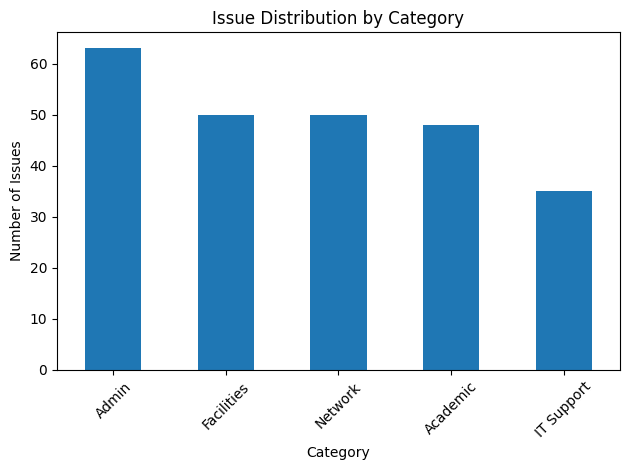

In [ ]:
# Category Distribution Visualization

category_counts = df["category_label"].value_counts()

plt.figure()
category_counts.plot(kind="bar")
plt.title("Issue Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Issues")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


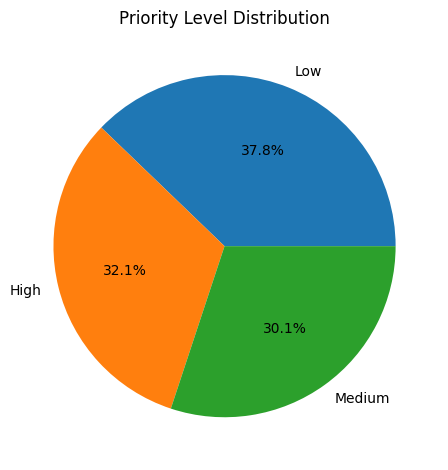

In [ ]:
# Priority Distribution Visualization

priority_counts = df["priority_label"].value_counts()

plt.figure()
priority_counts.plot(kind="pie", autopct='%1.1f%%')
plt.title("Priority Level Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()


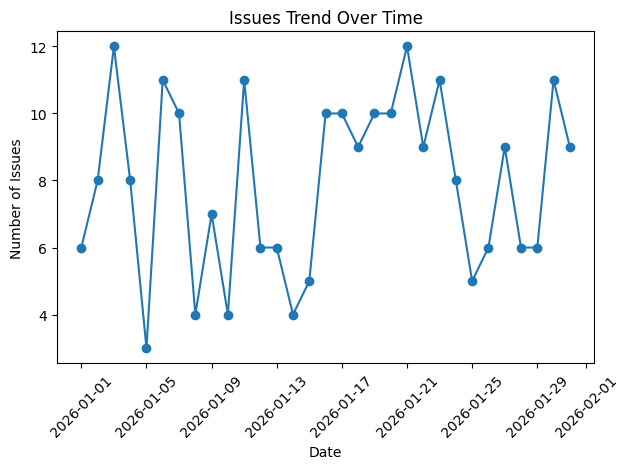

In [ ]:
# Issues Over Time (Trend Analysis)

if "timestamp" in df.columns:
    issues_over_time = df.groupby(df["timestamp"].dt.date).size()

    plt.figure()
    issues_over_time.plot(kind="line", marker="o")
    plt.title("Issues Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Issues")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


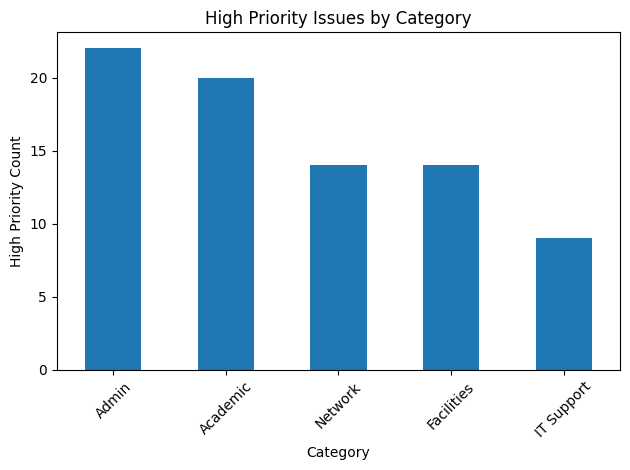

In [ ]:
# High Priority Issues per Category

high_priority = df[df["priority_label"].isin(["High", "P1"])]

high_priority_counts = high_priority["category_label"].value_counts()

plt.figure()
high_priority_counts.plot(kind="bar")
plt.title("High Priority Issues by Category")
plt.xlabel("Category")
plt.ylabel("High Priority Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


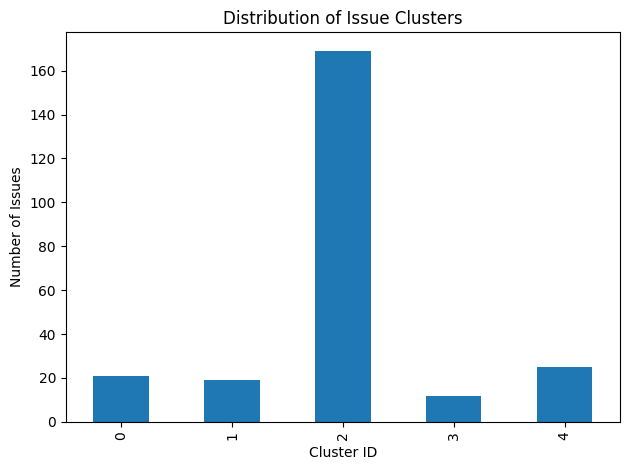

In [ ]:
# Cluster Distribution Visualization

cluster_counts = df["cluster"].value_counts().sort_index()

plt.figure()
cluster_counts.plot(kind="bar")
plt.title("Distribution of Issue Clusters")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Issues")
plt.tight_layout()
plt.show()


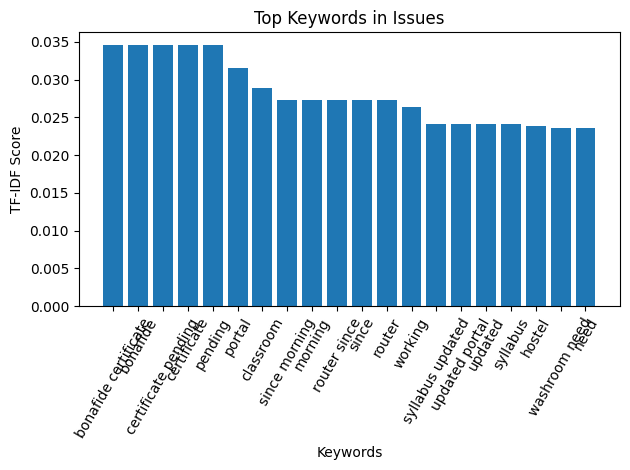

In [ ]:
# Top Keywords Visualization (Bar Chart)

plt.figure()
plt.bar(top_keywords["keyword"], top_keywords["tfidf_score"])
plt.title("Top Keywords in Issues")
plt.xlabel("Keywords")
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


In [ ]:
# Import Evaluation Libraries

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import pandas as pd


In [ ]:
# Category Classification Evaluation

# Accuracy
cat_accuracy = accuracy_score(y_test_cat, y_pred_cat)

# Precision, Recall, F1 (weighted for multiclass)
cat_precision = precision_score(y_test_cat, y_pred_cat, average='weighted')
cat_recall = recall_score(y_test_cat, y_pred_cat, average='weighted')
cat_f1 = f1_score(y_test_cat, y_pred_cat, average='weighted')

print("CATEGORY CLASSIFICATION PERFORMANCE")
print("Accuracy :", cat_accuracy)
print("Precision:", cat_precision)
print("Recall   :", cat_recall)
print("F1-Score :", cat_f1)


CATEGORY CLASSIFICATION PERFORMANCE
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-Score : 1.0


In [ ]:
# Category Confusion Matrix

cat_conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)

cat_conf_df = pd.DataFrame(
    cat_conf_matrix,
    index=category_model.classes_,
    columns=category_model.classes_
)

print("\nCategory Confusion Matrix:")
print(cat_conf_df)



Category Confusion Matrix:
            Academic  Admin  Facilities  IT Support  Network
Academic          10      0           0           0        0
Admin              0      9           0           0        0
Facilities         0      0          16           0        0
IT Support         0      0           0           6        0
Network            0      0           0           0        9


In [ ]:
# Detailed Category Report

print("\nCategory Classification Report:")
print(classification_report(y_test_cat, y_pred_cat))
pri_accuracy = accuracy_score(y_test_pri, y_pred_pri)
pri_precision = precision_score(y_test_pri, y_pred_pri, average='weighted')
pri_recall = recall_score(y_test_pri, y_pred_pri, average='weighted')
pri_f1 = f1_score(y_test_pri, y_pred_pri, average='weighted')

print("\nPRIORITY PREDICTION PERFORMANCE")
print("Accuracy :", pri_accuracy)
print("Precision:", pri_precision)
print("Recall   :", pri_recall)
print("F1-Score :", pri_f1)



Category Classification Report:
              precision    recall  f1-score   support

    Academic       1.00      1.00      1.00        10
       Admin       1.00      1.00      1.00         9
  Facilities       1.00      1.00      1.00        16
  IT Support       1.00      1.00      1.00         6
     Network       1.00      1.00      1.00         9

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


PRIORITY PREDICTION PERFORMANCE
Accuracy : 0.38
Precision: 0.384768115942029
Recall   : 0.38
F1-Score : 0.38179209726443764


In [ ]:
# Priority Confusion Matri

pri_conf_matrix = confusion_matrix(y_test_pri, y_pred_pri)

pri_conf_df = pd.DataFrame(
    pri_conf_matrix,
    index=priority_model.classes_,
    columns=priority_model.classes_
)

print("\nPriority Confusion Matrix:")
print(pri_conf_df)



Priority Confusion Matrix:
        High  Low  Medium
High       4    6       3
Low        6   12       6
Medium     5    5       3


In [ ]:
# Save Evaluation Results (Optional but Professional)

evaluation_results = {
    "Category Accuracy": cat_accuracy,
    "Category Precision": cat_precision,
    "Category Recall": cat_recall,
    "Category F1": cat_f1,
    "Priority Accuracy": pri_accuracy,
    "Priority Precision": pri_precision,
    "Priority Recall": pri_recall,
    "Priority F1": pri_f1
}

evaluation_df = pd.DataFrame.from_dict(
    evaluation_results, orient='index', columns=["Score"]
)

evaluation_df.to_csv("evaluation_results.csv")


In [ ]:
# Generate Final Structured Output for Each Issue

df["predicted_category"] = category_model.predict(X)
df["predicted_priority"] = priority_model.predict(X)

df[[
    "issue_text",
    "predicted_category",
    "predicted_priority"
]].head()


,issue_text,predicted_category,predicted_priority
0,Email account not accessible,IT Support,High
1,Network outage in computer lab,Network,Low
2,Bonafide certificate pending,Admin,Low
3,Internal marks not visible,Academic,High
4,Classroom projector not working,Facilities,Low


In [ ]:
# Compare Actual vs Predicted (Validation Table)

comparison_df = df[[
    "issue_text",
    "category_label",
    "predicted_category",
    "priority_label",
    "predicted_priority"
]]

comparison_df.head()


,issue_text,category_label,predicted_category,priority_label,predicted_priority
0,Email account not accessible,IT Support,IT Support,Medium,High
1,Network outage in computer lab,Network,Network,High,Low
2,Bonafide certificate pending,Admin,Admin,Medium,Low
3,Internal marks not visible,Academic,Academic,Medium,High
4,Classroom projector not working,Facilities,Facilities,Low,Low


In [ ]:
# High-Level System Summary (Auto-generated)

system_summary = {
    "Total Issues Processed": len(df),
    "Most Frequent Category": df["predicted_category"].value_counts().idxmax(),
    "Most Frequent Priority": df["predicted_priority"].value_counts().idxmax(),
    "High Priority Issues (%)":
        (df["predicted_priority"].value_counts().get("High", 0) / len(df)) * 100
}

print("SYSTEM SUMMARY")
for key, value in system_summary.items():
    print(f"{key}: {value}")


SYSTEM SUMMARY
Total Issues Processed: 246
Most Frequent Category: Admin
Most Frequent Priority: Low
High Priority Issues (%): 36.99186991869919


In [ ]:
# Save Final Output Dataset

df.to_csv("final_issue_insights_output.csv", index=False)


In [ ]:
# Final Demo Test (End-to-End)

def predict_issue(issue_text):
    clean_text_input = preprocess_text(issue_text)
    vector_input = tfidf.transform([clean_text_input])

    category = category_model.predict(vector_input)[0]
    priority = priority_model.predict(vector_input)[0]

    return category, priority


# Test example
test_issue = "Server is down and students cannot access the portal"
cat, pri = predict_issue(test_issue)

print("Issue:", test_issue)
print("Predicted Category:", cat)
print("Predicted Priority:", pri)


Issue: Server is down and students cannot access the portal
Predicted Category: IT Support
Predicted Priority: Medium
